In [1]:
import pandas as pd
import numpy as np

In [2]:
import mnist
from tensorflow import keras

In [3]:
from tensorflow.keras.layers import Dense, Dropout, Flatten

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

# 데이터 불러오기

In [5]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [6]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [7]:
eachImg = pd.DataFrame(train_images[2])

In [8]:
eachImg.to_csv("d:/eachImg.csv")

In [9]:
# 이미지 정규화
train_images = (train_images/255)
test_images = (test_images/255)

In [10]:
train_labels[2]

4

In [24]:
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [25]:
train_labels_one_hot[2]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

# 모델생성

In [26]:
train_images

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [41]:
# input layer를 위한 설정
inputShape = train_images[3].shape
inputShape

(28, 28)

In [42]:
# output layer를 위한 설정
nClass = 10
nCalss = len(np.unique(train_labels))
nCalss

10

In [29]:
model = Sequential()
# input layer
model.add(Flatten(input_shape = inputShape))
# hidden layer
model.add(Dense(units=16, activation="relu"))
model.add(Dense(units=16, activation="relu"))
# output layer
model.add(Dense(units=nCalss, activation="softmax"))

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 16)                12560     
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 10)                170       
                                                                 
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


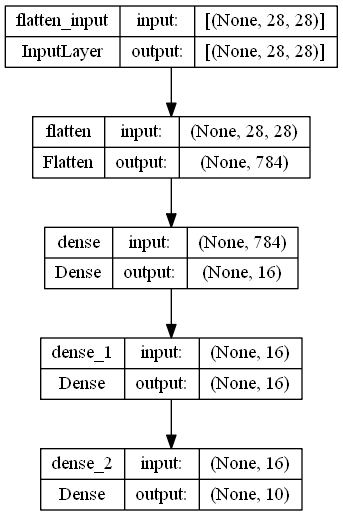

In [31]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file = "model_plot.png",
           show_shapes=True,
           show_layer_names = True)

# 모델 컴파일

In [32]:
model.compile(loss = "categorical_crossentropy",
             optimizer = "adam",
             metrics = ["accuracy"])

In [33]:
nClassry = model.fit(x = train_images,
                   y = train_labels_one_hot,
                   epochs = 10,
                   batch_size = 32,
                   validation_split = 0.2)

Epoch 1/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5029 - accuracy: 0.8557 - val_loss: 0.2712 - val_accuracy: 0.9227
Epoch 2/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2629 - accuracy: 0.9251 - val_loss: 0.2293 - val_accuracy: 0.9352
Epoch 3/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2200 - accuracy: 0.9354 - val_loss: 0.2014 - val_accuracy: 0.9402
Epoch 4/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1958 - accuracy: 0.9419 - val_loss: 0.1848 - val_accuracy: 0.9458
Epoch 5/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1806 - accuracy: 0.9470 - val_loss: 0.1844 - val_accuracy: 0.9453
Epoch 6/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.1703 - accuracy: 0.9492 - val_loss: 0.1742 - val_accuracy: 0.9495
Epoch 7/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1601 - accuracy: 0.9534 - val_loss: 0.1790 - val_accuracy:

### C-1. 모델 추론

In [34]:
model.evaluate(test_images, test_labels_one_hot)

313/313 [==============================] - 1s 1ms/step - loss: 0.1753 - accuracy: 0.9511


[0.17533093690872192, 0.9510999917984009]

### 에측

In [35]:
import cv2

In [36]:
# 카톡에서 다운받아서 할것
testImg = cv2.imread("./imageset/img_18.jpg", cv2.IMREAD_GRAYSCALE)

In [37]:
import matplotlib.pyplot as plt

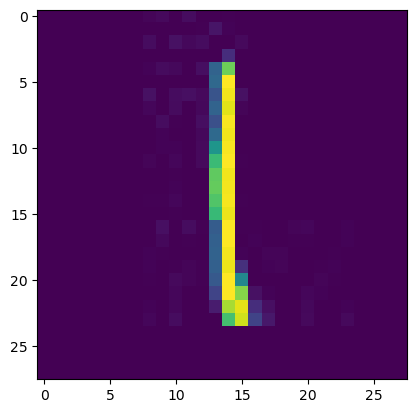

In [38]:
plt.imshow(testImg)

In [39]:
testImg = testImg.astype(float)

testImg = testImg/255.0

testImg = testImg.reshape(1,28,28)

answer = model.predict(testImg)

result = np.argmax(answer)

1/1 [==============================] - 0s 91ms/step


In [40]:
result

1